# NumPy vs Manual Sum Performance Comparison

This script compares the performance of summing a large array using:

1. **NumPy’s vectorized operation**
2. **Manual Python loop**

- np.random.rand(size): Creates an array with 10 million random numbers between 0 and 1.
- Efficient sum using NumPy’s built-in np.sum() method.
- time.time() is used to measure the duration.
- A for-loop adds each value one by one.
- Slower due to Python’s interpreted nature.
- Displays both the sum and the time taken for each method.
- .2f and .5f are used for formatting the decimal output.

In [1]:
import numpy as np
import time

# Generate a large array of random numbers
size = 10000000
data = np.random.rand(size)

# NumPy vectorized sum
start_np = time.time()
np_sum = np.sum(data)
end_np = time.time()

# Manual Python loop sum
start_py = time.time()
manual_sum = 0
for val in data:
    manual_sum += val
end_py = time.time()

# Print results
print(f"NumPy Sum: {np_sum:.2f} | Time: {end_np - start_np:.5f} sec")
print(f"Manual Sum: {manual_sum:.2f} | Time: {end_py - start_py:.5f} sec")

NumPy Sum: 4999614.01 | Time: 0.04335 sec
Manual Sum: 4999614.01 | Time: 3.72131 sec


### This command upgrades your pip (Python’s package installer) to the latest version.

- To make sure you’re using the latest pip version, which can:
  - Fix bugs
  - Add new features
  - Improve compatibility with newer Python packages


In [5]:
!python.exe -m pip install --upgrade pip

# Blog Scraper: Extract Titles and Content from Blogspot Articles

This Python script scrapes blog articles from specific Blogspot URLs using `requests`, `BeautifulSoup`, and `pandas`.

- requests: To send HTTP requests to each blog URL.
- BeautifulSoup: To parse and extract HTML content.
- pandas: To store extracted data in a tabular format.
- time: To add delay between requests (avoids overloading the server).
- List of URLs to Scrape --> These URLs will be visited one by one to extract article title and text.
- Web Scraping Logic
  - User-Agent: Pretends the request is coming from a browser to avoid blocking.
  - articles: A list to store extracted data.
- Loop Through Each URL
  - Send a GET request
  - Parse the HTML with BeautifulSoup
     - Extract:
     - Blog title ,Blog content and Combine all p tags into one string
- Store only if text is longer than 100 characters
- Wait 1 second between requests
- Converts the list of dictionaries into a DataFrame.
- Shows the first few scraped articles.

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

urls = [
    'https://techncruncher.blogspot.com/2025/01/top-10-ai-tools-that-will-transform.html',
    'https://techncruncher.blogspot.com/2023/12/limewire-ai-studio-review-2023-details.html',
    'https://techncruncher.blogspot.com/2023/01/top-10-ai-tools-in-2023-that-will-make.html',
    'https://techncruncher.blogspot.com/2022/11/top-10-ai-content-generator-writer.html',
    'https://techncruncher.blogspot.com/2022/09/cj-affiliate-ultimate-guide-to.html'
]

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
articles = []

for url in urls:
    try:
        res = requests.get(url, headers=headers, timeout=10)
        res.raise_for_status()
        soup = BeautifulSoup(res.content, 'lxml')

        title = soup.find('h3', class_='post-title')
        title = title.get_text(strip=True) if title else soup.title.get_text(strip=True)

        content_div = soup.find('div', class_='post-body entry-content')
        if not content_div:
            print(f"[SKIP] No content: {url}")
            continue

        paragraphs = content_div.find_all('p')
        text = ' '.join(p.get_text(strip=True) for p in paragraphs)

        if len(text) > 100:
            articles.append({'url': url, 'title': title, 'text': text})
        else:
            print(f"[SKIP] Too short: {url}")

        time.sleep(1)
    except Exception as e:
        print(f"[ERROR] {url} -> {e}")

df = pd.DataFrame(articles)
df.head()

[SKIP] Too short: https://techncruncher.blogspot.com/2022/09/cj-affiliate-ultimate-guide-to.html


,url,title,text
0,https://techncruncher.blogspot.com/2025/01/top...,Top 10 AI Tools That Will Transform Your Conte...,Looking to level up your content creation gam...
1,https://techncruncher.blogspot.com/2023/12/lim...,"LimeWire AI Studio Review 2023: Details, Prici...",In the rapidly advancing landscape of AI tech...
2,https://techncruncher.blogspot.com/2023/01/top...,Top 10 AI Tools in 2023 That Will Make Your Li...,"In this article, we explore the top 10 AI too..."
3,https://techncruncher.blogspot.com/2022/11/top...,Top 10 AI Content Generator & Writer Tools in ...,There are a number of different AI content ...


# NLP Feature Extraction with spaCy

This code uses the `spaCy` library to extract **linguistic features** from scraped article texts. These features include token count, sentence count, named entities, and noun count.

## Step 1: Load spaCy and Language Model
- spacy.load("en_core_web_sm") loads the small English language model.
- nlp(text) processes the text and creates a Doc object for analysis.

### Step 2: Define Feature Extraction Function
- This function extracts the following features from a single text:
   - num_tokens: Total words/tokens in the document.
   - num_sentences: Total number of sentences.
   - num_entities: Count of named entities (e.g., persons, locations, organizations).
   - num_nouns: Total number of nouns.

### Step 3: Apply Feature Extraction to Articles
- Applies extract_features() to each article's text.
- Adds the extracted features to the original df using pd.concat.
- Also calculates and adds a title_length column.

### Notes:
- Make sure the spaCy model is installed:
  - python -m spacy download en_core_web_sm
- You can expand this by also extracting verbs, adjectives, or custom keywords.

In [11]:
!pip install spacy

In [12]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 6.8 MB/s eta 0:00:02
     ----- ---------------------------------- 1.8/12.8 MB 5.5 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 5.1 MB/s eta 0:00:03
     --------- ------------------------------ 2.9/12.8 MB 4.3 MB/s eta 0:00:03
     --------- ------------------------------ 2.9/12.8 MB 4.3 MB/s eta 0:00:03
     --------- ------------------------------ 2.9/12.8 MB 4.3 MB/s eta 0:00:03
     --------- ------------------------------ 3.1/12.8 MB 2.3 MB/s eta 0:00:05
     --------- ------------------------------ 3.1/12.8 MB 2.3 MB/s eta 0:00:05
     ---------- ----------------------------- 3.4/12.8 MB 2.0 MB/s eta 0:00:05
     ----------- ---------------------------- 3.7/12.8 MB 1.8 MB/s eta 0:00:06
     ------------ --------------------------- 3.9/12.8 MB 1.7 MB/s eta 0:00:06
     ------------ --------------------------- 3.9/12.8 MB 1

In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_features(text):
    doc = nlp(text)
    return pd.Series({
        'num_tokens': len(doc),
        'num_sentences': len(list(doc.sents)),
        'num_entities': len(doc.ents),
        'num_nouns': len([t for t in doc if t.pos_ == 'NOUN'])
    })

if not df.empty:
    features = df['text'].apply(extract_features)
    df = pd.concat([df, features], axis=1)
    df['title_length'] = df['title'].apply(len)
else:
    print("⚠️ No articles found.")


# Visualizing Article Lengths with Seaborn

This code creates a **histogram** to visualize the distribution of token counts (i.e., article lengths in number of words/tokens) using `seaborn` and `matplotlib`.

- seaborn: Makes beautiful, statistical plots.
- matplotlib.pyplot: Controls the plot’s appearance (titles, labels, etc.).
- Ensures there is data in the DataFrame before trying to plot it.
- Plots the distribution of article lengths using the num_tokens column.
- kde=True adds a smooth curve (Kernel Density Estimate) to visualize the probability distribution.
- Adds a clear title and axis labels.
- plt.show() displays the plot.

### Shows:
- X-axis: Number of tokens (words) in each article.
- Y-axis: Frequency of articles with that token count.
- The KDE line gives a smoothed view of the distribution shape.

This is useful for understanding how long your articles are and whether you have mostly short, medium, or long articles.



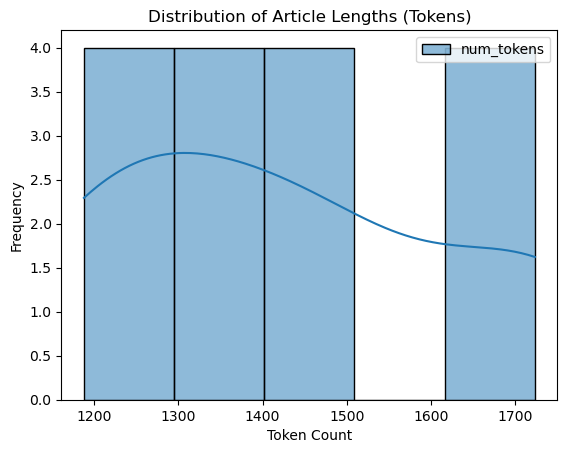

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty:
    sns.histplot(df['num_tokens'], kde=True)
    plt.title("Distribution of Article Lengths (Tokens)")
    plt.xlabel("Token Count")
    plt.ylabel("Frequency")
    plt.show()

# Named Entities per Article (Bar Plot)

This code creates a **bar plot** to visualize how many named entities (like people, places, organizations, etc.) are found in each article using spaCy's `doc.ents`.

- Ensures that the DataFrame df contains data before plotting.
- Prevents errors if the DataFrame is empty.
- Plotting bar chart:
  - Uses Seaborn's barplot() to plot:
     - X-axis: Article titles
     - Y-axis: Number of named entities in each article
- data=df: Pulls the values from your DataFrame.
- Rotates the x-axis labels 45 degrees.
- ha='right' (horizontal alignment) makes long titles easier to read.
- Adds a title and axis labels for better understanding.
- df['title'] = df['title'].astype(str): Ensures the article titles are strings, required for plotting on the x-axis.
- plt.xticks(rotation=45): Makes sure long titles are readable.
- plt.show() displays the final plot.

### Shows:
- You can easily compare which articles contain the most named entities.
- Helps identify richer or more information-dense content based on named entity recognition (NER).

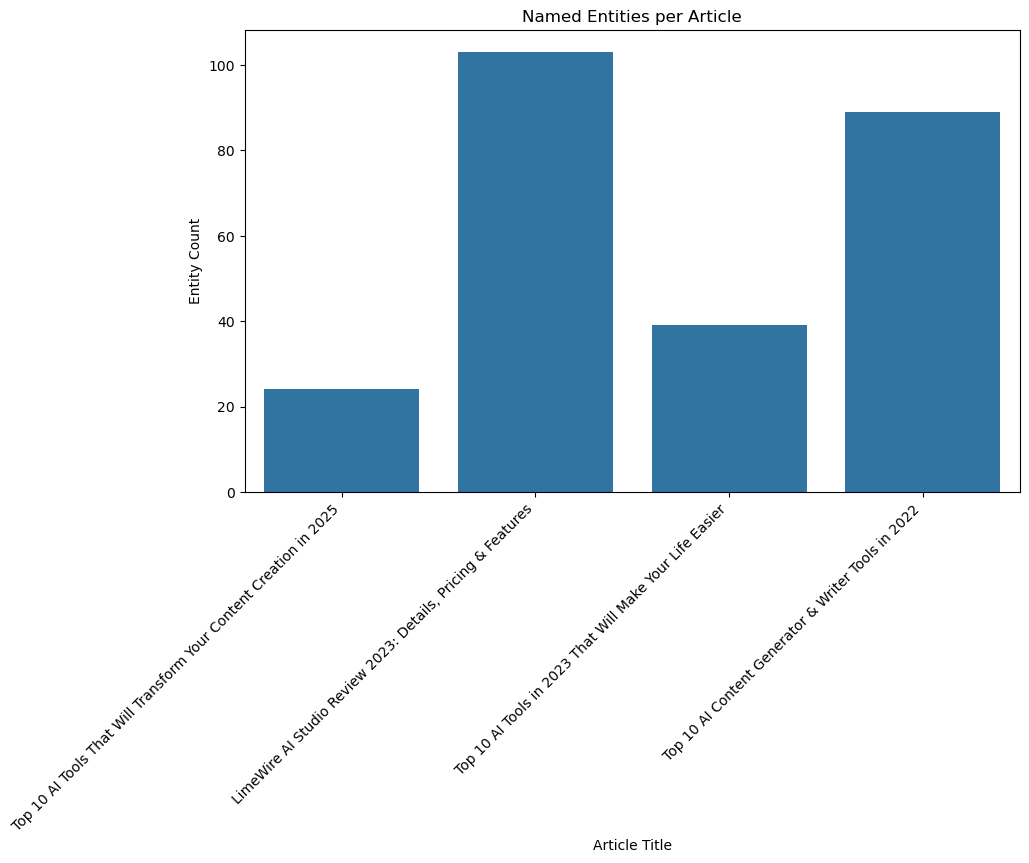

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only proceed if DataFrame is not empty
if not df.empty:
    df['title'] = df['title'].astype(str)  # Ensure title is string
    
    # Plot the named entities per article
    plt.figure(figsize=(10, 6))
    sns.barplot(x='title', y='num_entities', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title("Named Entities per Article")
    plt.ylabel("Entity Count")
    plt.xlabel("Article Title")
    plt.show()


# 📊 Noun Density per Article

- noun_density gives a sense of how descriptive or object-focused the article is.
- Higher values mean the article uses more nouns relative to its length.
- Make sure num_nouns and num_tokens exist and are numeric columns in your DataFrame.
- X‑axis: Article titles
- Y‑axis: Proportion of tokens that are nouns (noun_density)
- Articles with higher bars are more noun‑rich, indicating they may be heavier on subject/object content (e.g., lists of tools, products, names).

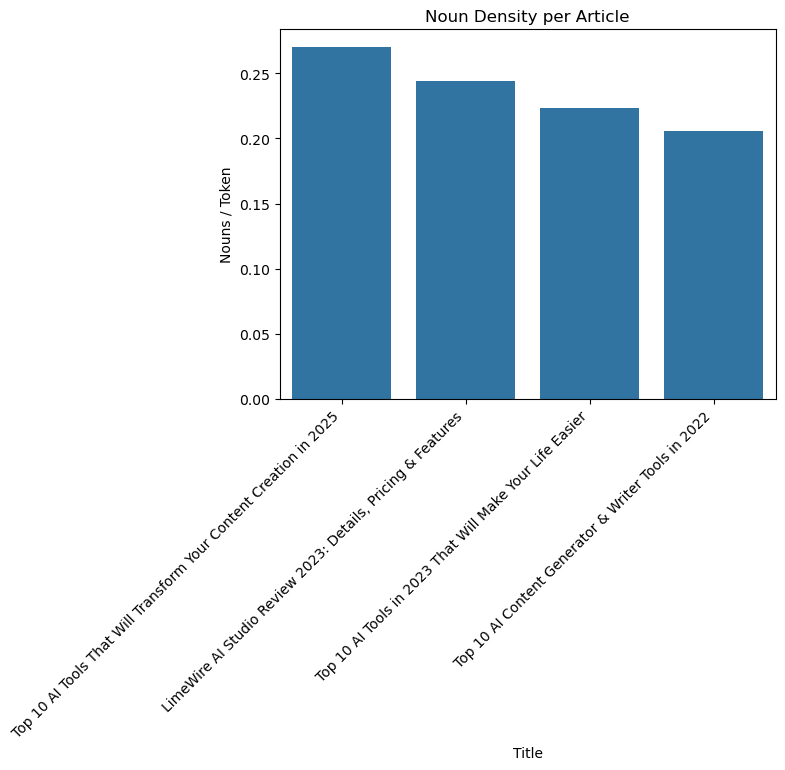

In [34]:
if not df.empty:
    df['noun_density'] = df['num_nouns'] / df['num_tokens']
    sns.barplot(x='title', y='noun_density', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title("Noun Density per Article")
    plt.ylabel("Nouns / Token")
    plt.xlabel("Title")
    plt.show()

### Entity Type Distribution

This visualization shows how frequently different types of named entities (like PERSON, ORG, DATE, etc.) appear across all articles. It helps understand the nature of information in the dataset.

- We want to analyze what kind of named entities (like PERSON, ORG, DATE, etc.) appear in our scraped articles. This step will:
- Extract all named entities using spaCy
- Count how many times each type of entity appears
- Plot a bar chart to show the distribution
- This chart uses spacy to extract named entities (doc.ents) and their labels (ent.label_).
- The output shows the most common entity types such as ORG, PERSON, GPE, etc.
- Helpful for analyzing the dominant kinds of information present in articles.


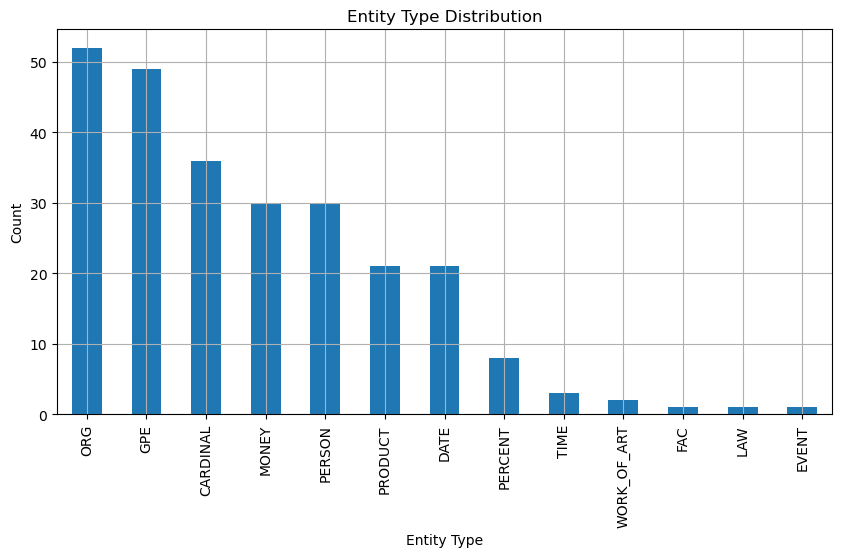

In [36]:
from collections import Counter

all_entities = []
for text in df['text']:
    doc = nlp(text)
    all_entities.extend([ent.label_ for ent in doc.ents])

entity_counts = Counter(all_entities)
entity_df = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['count']).sort_values('count', ascending=False)

if not entity_df.empty:
    entity_df.plot(kind='bar', figsize=(10,5), legend=False)
    plt.title("Entity Type Distribution")
    plt.ylabel("Count")
    plt.xlabel("Entity Type")
    plt.grid(True)
    plt.show()

### Analyzing Sentiment of Articles using TextBlob

- we perform sentiment analysis on each article using TextBlob. It will help us understand the overall emotional tone (positive, negative, or neutral) of the articles.
- Polarity Score Range: -1 to +1
   - +1 = Very positive
   - 0 = Neutral
   - -1 = Very negative
- A histogram showing how many articles fall into different sentiment ranges.
- This helps you visually see whether your dataset contains mostly positive, negative, or neutral articles.

In [38]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.3 MB/s eta 0:00:00


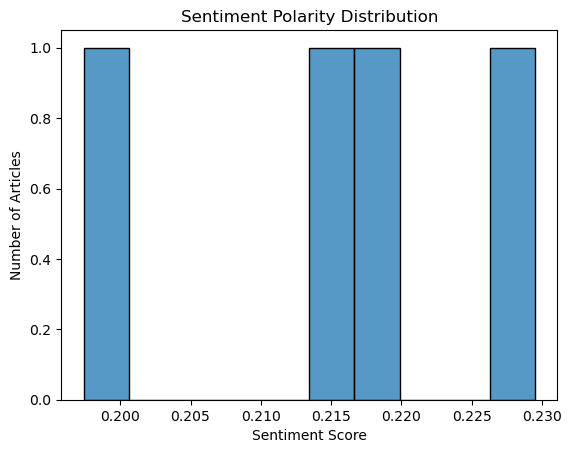

In [39]:
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.histplot(df['sentiment'], bins=10)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Articles")
plt.show()


### Summary of Article Features

The following table shows the extracted features for each article, including:

- **Title**: The headline of the article.
- **Title Length**: Number of characters in the title.
- **Number of Tokens**: Total words/tokens in the article.
- **Number of Sentences**: Count of sentences detected.
- **Number of Entities**: Named entities like people, locations, organizations, etc.
- **Number of Nouns**: Total nouns used in the article.
- **Noun Density**: Ratio of nouns to total tokens.
- **Sentiment**: Polarity score of the article text using TextBlob, ranging from -1 (negative) to +1 (positive).

In [40]:
df[['title', 'title_length', 'num_tokens', 'num_sentences', 'num_entities', 'num_nouns', 'noun_density', 'sentiment']]

,title,title_length,num_tokens,num_sentences,num_entities,num_nouns,noun_density,sentiment
0,Top 10 AI Tools That Will Transform Your Conte...,65,1188,47,24,321,0.270202,0.229493
1,"LimeWire AI Studio Review 2023: Details, Prici...",59,1723,65,103,420,0.243761,0.219387
2,Top 10 AI Tools in 2023 That Will Make Your Li...,55,1480,52,39,331,0.223649,0.197417
3,Top 10 AI Content Generator & Writer Tools in ...,50,1319,63,89,271,0.205459,0.214853


In [41]:
!pip install scikit-learn

### Top 20 TF-IDF Terms Across Articles

This plot highlights the most significant words (terms) found across all articles using **TF-IDF (Term Frequency–Inverse Document Frequency)**.

- **TF-IDF** scores help identify important words in a document by balancing:
  - Term frequency (how often a word appears in a document)
  - Inverse document frequency (how unique that word is across all documents)

#### Plot Description:
- **X-axis**: Top 20 keywords (after removing stop words) with the highest overall TF-IDF scores.
- **Y-axis**: Sum of TF-IDF scores of each term across all articles.
- Higher bars indicate terms that are more unique and important in the overall dataset.


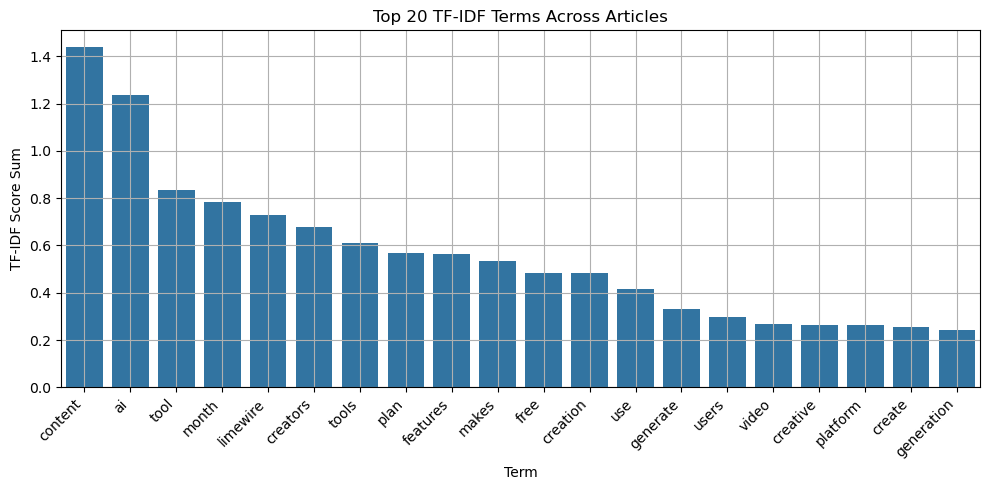

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limit to top 20 terms for display
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

X = vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show top TF-IDF features across all documents
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_sums.index, y=tfidf_sums.values)
plt.title("Top 20 TF-IDF Terms Across Articles")
plt.ylabel("TF-IDF Score Sum")
plt.xlabel("Term")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()
